In [1]:
from ultralytics import YOLO
import yaml
import cv2


image 1/1 C:\Users\Realme\Desktop\testpic\pec.jpg: 384x640 3 agricultural_lands, 11 buildings, 6 greenlands, 345.4ms
Speed: 7.6ms preprocess, 345.4ms inference, 31.1ms postprocess per image at shape (1, 3, 384, 640)
Total objects detected: 20
Class: building, Confidence: 0.93
Class: greenland, Confidence: 0.93
Class: building, Confidence: 0.92
Class: building, Confidence: 0.87
Class: agricultural_land, Confidence: 0.85
Class: building, Confidence: 0.77
Class: greenland, Confidence: 0.76
Class: greenland, Confidence: 0.72
Class: building, Confidence: 0.71
Class: agricultural_land, Confidence: 0.69
Class: greenland, Confidence: 0.66
Class: building, Confidence: 0.62
Class: building, Confidence: 0.62
Class: building, Confidence: 0.59
Class: greenland, Confidence: 0.57
Class: building, Confidence: 0.55
Class: building, Confidence: 0.53
Class: agricultural_land, Confidence: 0.45
Class: greenland, Confidence: 0.43
Class: building, Confidence: 0.41


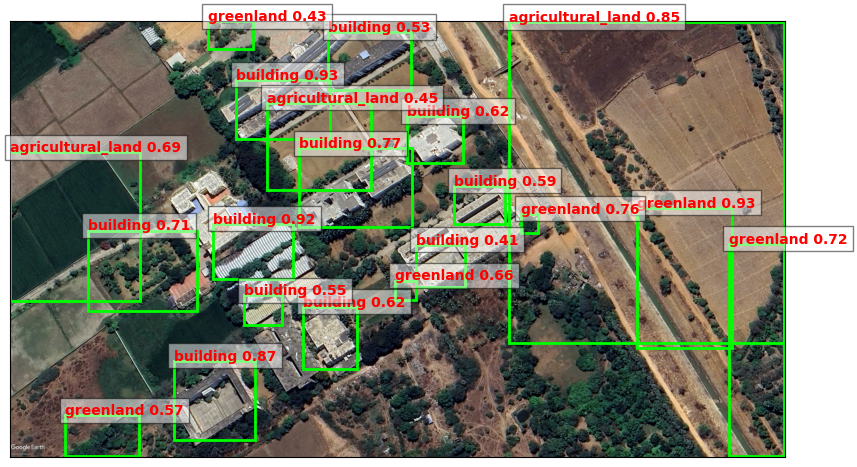

In [3]:
from ultralytics import YOLO
import yaml
import torch
import matplotlib.pyplot as plt
import cv2

# Load the trained YOLO model
path = r"C:\Users\Realme\Desktop\yolo\best.pt"

model = YOLO(path)


# Load class names from data.yaml
with open(r"C:\Users\Realme\Desktop\image\data.yaml", "r") as f:
    class_names = yaml.safe_load(f)["names"]

image_path =r"C:\Users\Realme\Desktop\testpic\pec.jpg"
# Run inference on an image
results = model(image_path, conf=0.4, iou=0.1)
  # Replace with your image file

# Load the image
image = cv2.imread(image_path)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB for Matplotlib

# Create a figure
fig, ax = plt.subplots(figsize=(10, 6))
ax.imshow(image)

# Loop through results
for result in results:
    detections = result.boxes
    num_objects = len(detections)
    print(f"Total objects detected: {num_objects}")

    # Draw bounding boxes
    for box in detections:
        cls_id = int(box.cls[0])
        conf = float(box.conf[0])
        class_name = class_names[cls_id]

        # Get bounding box coordinates
        x1, y1, x2, y2 = map(int, box.xyxy[0])

        # Draw rectangle
        rect = plt.Rectangle((x1, y1), x2 - x1, y2 - y1, linewidth=2, edgecolor='lime', facecolor='none')
        ax.add_patch(rect)

        # Add label
        label = f"{class_name} {conf:.2f}"
        ax.text(x1, y1 - 5, label, color='red', fontsize=10, fontweight='bold', bbox=dict(facecolor='white', alpha=0.5))

        print(f"Class: {class_name}, Confidence: {conf:.2f}")

# Hide axes
ax.set_xticks([])
ax.set_yticks([])

# Show image
plt.show()
